In [43]:
from PIL import Image
import pytesseract
import cv2
import numpy as np

from matplotlib import pyplot as plt

#pytesseract.pytesseract.tesseract_cmd = r'D:\Dev\envs\py36\Library\bin\tesseract.exe'
#!tesseract --list-langs


In [14]:
text_from_image = pytesseract.image_to_string(Image.open('ticket_inter_20230222_crop.jpg'))
print(text_from_image)

Intermarché

SAS BEAUROCHAY

15 COURS DE L'ANCIENNE

BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : 01 46 62 49 80

NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
CASSEGRAIN P.P CAROT pr,
JR HALOPAC 2TR.COEUR 2
3,

64 EUR A
CORAYA 10 BAT |LANGOU 50 EUR A
*xAXE DEO DARK TEMPTA 6,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
NIVEA DEMAQUILL YEUX 7

MONTANT DU
, a

CB SANS CONTACT 34,97, EUR




# OpenCV image preprocessing

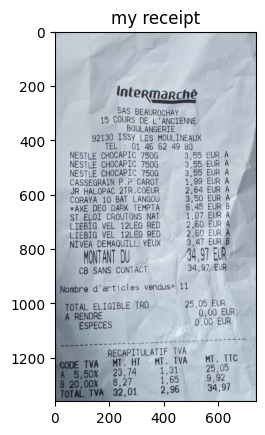

In [51]:
img = cv2.imread('ticket_inter_20230222_crop.jpg')

plt.imshow(img)
plt.title('my receipt')
plt.show()

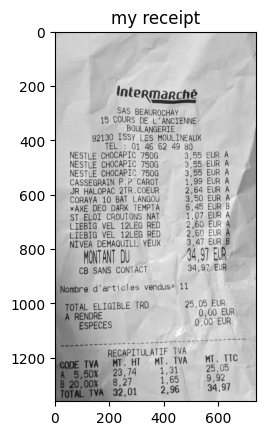

In [53]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #IMREAD_GRAYSCALE

plt.imshow(img_gray, cmap="gray")
plt.title('my receipt')
plt.show()

## Do not enlarge contrast by histogram equalization
maps the input pixels in brighter region to output pixels in full region

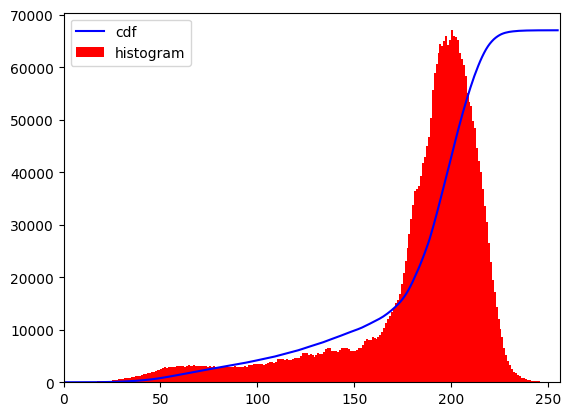

In [54]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

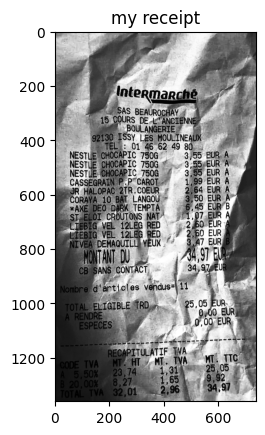

In [57]:
equ = cv2.equalizeHist(img_gray)

plt.imshow(equ, cmap="gray")
plt.title('my receipt')
plt.show()

=> ewww

## Enlarge luminosity and contrast

In [68]:
img_gray = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)

In [96]:
def increase_light_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """

    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def increase_dark_contrast(im, value=30):
    """
    Takes an Image and a threshold value
    Return the processed Image, having light contrast enlarged
    based on https://stackoverflow.com/users/5629538/bill-grates 's answer
    """
    
    hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v < lim] = 0

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

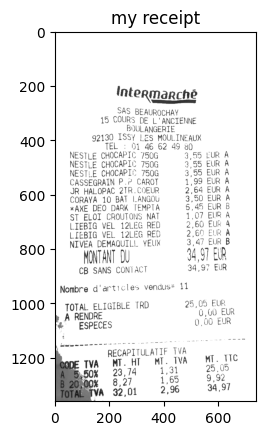

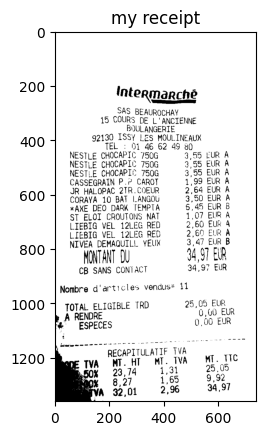

In [120]:
img_light = increase_light_contrast(img_gray, value=130)

plt.imshow(img_light, cmap="gray")
plt.title('my receipt')
plt.show()

img_dark = increase_dark_contrast(img_light, value=100) #100

plt.imshow(img_dark, cmap="gray")
plt.title('my receipt')
plt.show()

In [122]:
text_from_image = pytesseract.image_to_string(
    Image.fromarray(img_dark)
)
print(text_from_image)

Intermarché

SAS BEAUROCHAY
15 COURS DE L' ANCIENNE
BOULANGERTE
92130 ISSY LES MOULINEAUX
TEL : 01 46 62 49 80

NESTLE CHOCAPIC 7506 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
NESTLE CHOCAPIC 750G 3,55 EUR A
CASSEGRAIN P.? CAROT 1,99 EUR A
JR HALOPAC 2TR.COEUR 2,64 EUR A
CORAYA 10 BAT |LANGOU 3,50 EUR A
*xAXE DEO DARK TEMPTA §,45 EUR B
ST ELOI CROUTONS NAT 1,07 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
LIEBIG VEL 12LEG RED 2,60 EUR A
NIVEA DEMAQUILL YEUX 3,47 EUR B
MONTANT DU 34,97 EWR
CB SANS CONTACT 34,97 EUR
Nombre d'articles vendus= 11
TOTAL ELIGIBLE TRD 25,05 EUR
# A RENDRE 6, G0 EUR
a ESPECES 0,00 EUR

| Ween nee

RECAPITULATIF 1VA

¥ 23.74 1,31 25 05
1°65

2,96 34,97


